Goodreads Book Recommendation Case Study
Final Capstone Project

Archana

Introduction


As a keen reader myself, my To-Be-Read list increases by the moment, and it is a list where I keep names of titles and writers that I wish to read. Goodreads is a social webapp that helps readers like me organize our books into To-Be-Read, read, and reading! It also suggests book titles and authors based on interests and friends' interests.

This Goodreads-books dataset from Kaggle gives us clean data derived from the Goodreads API. In this case study, we get to explore an array of models and time series nalaysis. learning models to determine the most fitting one that can be used to recommend books.


In [ ]:
#Data Setup
#Import initial libraries
import numpy as np
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt # plotting
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats.mstats import winsorize
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
import time

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import plotly.express as px
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import os # accessing directory structure
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
sns.set
# Warnings
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
#loading the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/Colab Notebooks/good_books.csv"
Book_df = pd.read_csv(path)
print(Book_df.info())
print('Dimensions:', Book_df.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         4 non-null      object
dtypes: int64(3), object(10)
memory usag

In [ ]:
Book_df.head(n=10)

NameError: name 'Book_df' is not defined

In [ ]:
len(Book_df['title'].unique())

10352

Feature Engineering

Data Preview

In this section

 we will explore, understand, and standardize the contents of the dataset.

In [ ]:
column_names = list(Book_df.columns.values)
print(column_names)

['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher', 'Unnamed: 12']


In [ ]:
# Checking for nulls in DataFrame
print('Nulls in df: ', Book_df.isnull().values.any())
print('Sum of nulls: ', Book_df.isnull().sum())

Nulls in df:  True
Sum of nulls:  bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64


In [ ]:
Book_df.duplicated().sum()

0

In [ ]:
Book_df.describe()


,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [ ]:
Book_df.round({'average_rating': 2})

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.78E+12,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78E+12,eng,635,783,56,12/1/1988,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78E+12,eng,415,820,95,8/1/1993,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.78E+12,eng,434,769,139,2/27/2007,Ecco,NaN


Next we will make some adjustments in the 'authors' column to make some authors more consistent.

In [ ]:
Book_df.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)

Next we check and combine any possible language codes together. We can see that the 'eng', 'en-GB', 'en-CA', and 'en-US' can be combined.

In [ ]:
print(Book_df.language_code.unique().tolist())

['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm', 'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp', '9.78E+12', 'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla', 'ale']


In [ ]:
Book_df.replace(to_replace='en-US', value = 'eng', inplace=True)
Book_df.replace(to_replace='en-CA', value = 'eng', inplace=True)
Book_df.replace(to_replace='en-GB', value = 'eng', inplace=True)

In [ ]:
# Preview of unique values.
unique_vals = {}
unique_vals['title'] = Book_df.title.unique().tolist()
unique_vals['authors'] = Book_df.authors.unique().tolist()
unique_vals['average_rating'] = Book_df.average_rating.unique().tolist()
unique_vals['isbn'] = Book_df.isbn.unique().tolist()
unique_vals['isbn13'] = Book_df.isbn13.unique().tolist()
unique_vals['language_code'] = Book_df.language_code.unique().tolist()
unique_vals['ratings_count'] = Book_df.ratings_count.unique().tolist()
unique_vals['text_reviews_count'] = Book_df.text_reviews_count.unique().tolist()
unique_vals['publication_date'] = Book_df.publication_date.unique().tolist()
unique_vals['publisher'] = Book_df.publisher.unique().tolist()

In [ ]:
# Number of unique values in each feature
for key, value in unique_vals.items():
    print(key,':', len([item for item in value if item]))

title : 10352
authors : 6643
average_rating : 213
isbn : 11126
isbn13 : 28
language_code : 25
ratings_count : 5293
text_reviews_count : 1821
publication_date : 3682
publisher : 2294


EDA


We can now look at the correlation matrix of the numerical features.

---



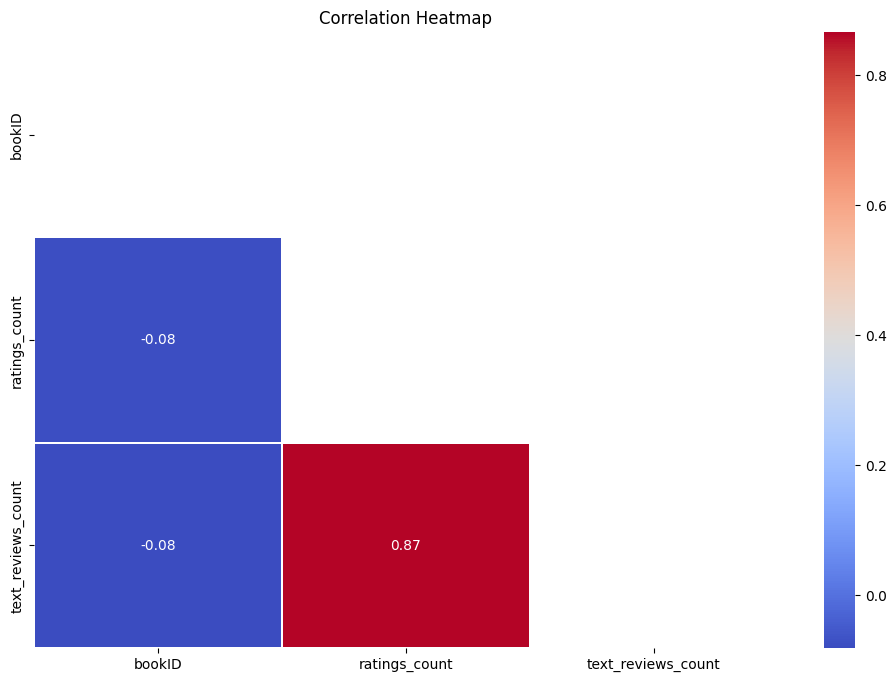

In [ ]:
# Calculate the correlation matrix
corr_matrix = Book_df.corr()

# Changing the matrix shape to remove redundant data
matrix = np.triu(Book_df.corr())

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05, mask=matrix)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()